In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
output_dir = "generate_csv"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
def save_to_csv(output_dir, data, name_prefix, header=None, n_parts=10):
    path_format = os.path.join(output_dir, "{}_{:02d}.csv")
    filenames = []
    
    for file_idx, row_indices in enumerate(np.array_split(np.arange(len(data)), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filenames.append(part_csv)
        
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header + "\n")
            for row_index in row_indices:
                f.write(",".join([repr(col) for col in data[row_index]]))
                f.write("\n")
            
    return filenames

train_data = np.c_[x_train_scaled, y_train]
valid_data = np.c_[x_valid_scaled, y_valid]
test_data = np.c_[x_test_scaled, y_test]

header_cols = housing.feature_names + ["MidianHouseValue"]
header_str = ",".join(header_cols)

train_filenames = save_to_csv(output_dir, train_data, "train", header_str, n_parts=20)
valid_filenames = save_to_csv(output_dir, valid_data, "valid", header_str, n_parts=20)
test_filenames = save_to_csv(output_dir, test_data, "test", header_str, n_parts=10)

In [6]:
import pprint
print("train_filenames:")
pprint.pprint(train_filenames)
print("valid_filenames:")
pprint.pprint(valid_filenames)
print("test_filenames:")
pprint.pprint(test_filenames)

train_filenames:
['generate_csv\\train_00.csv',
 'generate_csv\\train_01.csv',
 'generate_csv\\train_02.csv',
 'generate_csv\\train_03.csv',
 'generate_csv\\train_04.csv',
 'generate_csv\\train_05.csv',
 'generate_csv\\train_06.csv',
 'generate_csv\\train_07.csv',
 'generate_csv\\train_08.csv',
 'generate_csv\\train_09.csv',
 'generate_csv\\train_10.csv',
 'generate_csv\\train_11.csv',
 'generate_csv\\train_12.csv',
 'generate_csv\\train_13.csv',
 'generate_csv\\train_14.csv',
 'generate_csv\\train_15.csv',
 'generate_csv\\train_16.csv',
 'generate_csv\\train_17.csv',
 'generate_csv\\train_18.csv',
 'generate_csv\\train_19.csv']
valid_filenames:
['generate_csv\\valid_00.csv',
 'generate_csv\\valid_01.csv',
 'generate_csv\\valid_02.csv',
 'generate_csv\\valid_03.csv',
 'generate_csv\\valid_04.csv',
 'generate_csv\\valid_05.csv',
 'generate_csv\\valid_06.csv',
 'generate_csv\\valid_07.csv',
 'generate_csv\\valid_08.csv',
 'generate_csv\\valid_09.csv',
 'generate_csv\\valid_10.csv',
 'gen

In [7]:
# 1. filename -> dataset
# 2. read file -> dataset -> datasets -> merge
# parse csv

filename_dataset = tf.data.Dataset.list_files(train_filenames)
for filename in filename_dataset:
    print(filename)

tf.Tensor(b'generate_csv\\train_03.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_13.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_10.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_15.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_05.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_12.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_01.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_04.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_17.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_06.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_00.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_02.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_16.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_14.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\\train_11.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv\

In [9]:
n_readers = 5
dataset = filename_dataset.interleave(
    lambda fliename: tf.data.TextLineDataset(filename).skip(1),
    cycle_length=n_readers
)
for line in dataset.take(15):
    print(line.numpy())

b'-1.1199749330438333,-1.329843308393715,0.1419004518620726,0.4658136987980791,-0.10301777467500105,-0.10744184416176107,-0.7950524078397521,1.5304716763409,0.66'
b'-1.1199749330438333,-1.329843308393715,0.1419004518620726,0.4658136987980791,-0.10301777467500105,-0.10744184416176107,-0.7950524078397521,1.5304716763409,0.66'
b'-1.1199749330438333,-1.329843308393715,0.1419004518620726,0.4658136987980791,-0.10301777467500105,-0.10744184416176107,-0.7950524078397521,1.5304716763409,0.66'
b'-1.1199749330438333,-1.329843308393715,0.1419004518620726,0.4658136987980791,-0.10301777467500105,-0.10744184416176107,-0.7950524078397521,1.5304716763409,0.66'
b'-1.1199749330438333,-1.329843308393715,0.1419004518620726,0.4658136987980791,-0.10301777467500105,-0.10744184416176107,-0.7950524078397521,1.5304716763409,0.66'
b'-0.9490938885377456,0.6726626072973063,0.28370554761513944,0.10655529643465292,-0.6546477749692311,-0.0623949278698749,0.21273656121863005,0.0024704978154519064,0.607'
b'-0.9490938885

In [12]:
# tf.io.decode_csv(str, record_defaults)

sample_str = '1,2,3,4,5'
record_defaults = [tf.constant(0, dtype=tf.int32)] * 5
parse_fields = tf.io.decode_csv(sample_str, record_defaults)
print(parse_fields)

[<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=5>]


In [13]:
# tf.io.decode_csv(str, record_defaults)

sample_str = '1,2,3,4,5'
record_defaults = [
    tf.constant(0, dtype=tf.int32),
    0,
    np.nan,
    "hello",
    tf.constant([])]
parse_fields = tf.io.decode_csv(sample_str, record_defaults)
print(parse_fields)

[<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, <tf.Tensor: shape=(), dtype=string, numpy=b'4'>, <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]


In [14]:
try:
    parse_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Field 4 is required but missing in record 0! [Op:DecodeCSV]


In [15]:
try:
    parse_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [19]:
def parse_csv_line(line, n_fields=9):
    defs = [tf.constant(np.nan)] * n_fields
    parse_fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(parse_fields[0:-1])
    y = tf.stack(parse_fields[-1:])
    return x,y

parse_csv_line(b'3.8743126570888804,-0.8492418886278699,1.2254810098923188,-0.023587924660354292,0.10202890306594632,0.03335714649304235,-1.2289615472954436,1.1709419872760878,5.00001',
              n_fields=9)

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 3.8743126 , -0.8492419 ,  1.225481  , -0.02358793,  0.10202891,
         0.03335715, -1.2289616 ,  1.170942  ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.00001], dtype=float32)>)

In [20]:
# 1. filename -> dataset
# 2. read file -> dataset -> datasets -> merge
# parse csv

def csv_reader_dataset(filenames, n_readers=5, batch_size=32, n_parse_threads=5, shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.list_files(filenames)
    dataset = dataset.repeat()
    dataset = dataset.interleave(
        lambda filename: tf.data.TextLineDataset(filename).skip(1), cycle_length=n_readers
    )
    dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(parse_csv_line, num_parallel_calls = n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset

train_set = csv_reader_dataset(train_filenames, batch_size=3)
for x_batch, y_batch in train_set.take(2):
    print("x:")
    pprint.pprint(x_batch)
    print("y:")
    pprint.pprint(y_batch)

Cause: could not parse the source code:

        lambda filename: tf.data.TextLineDataset(filename).skip(1), cycle_length=n_readers

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

        lambda filename: tf.data.TextLineDataset(filename).skip(1), cycle_length=n_readers

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
x:
<tf.Tensor: shape=(3, 8), dtype=float32, numpy=
array([[-8.2195884e-01,  1.8741661e+00,  1.8212350e-01, -3.1700194e-02,
        -6.0111791e-01, -1.4337493e-01,  1.0852206e+00, -8.6139947e-01],
       [ 1.5782312e-01,  4.3236190e-01,  3.3799481e-01, -1.5880305e-02,
        -3.7338907e-01, -5.3052455e-02,  8.0061346e-01, -1.2359096e+00],
       [ 4.9710345e-02, -8.4924191e-01, -6.2146995e

In [22]:
batch_size = 32
train_set = csv_reader_dataset(train_filenames, batch_size=batch_size)
valid_set = csv_reader_dataset(valid_filenames, batch_size=batch_size)
test_set = csv_reader_dataset(test_filenames, batch_size=batch_size)

Cause: could not parse the source code:

        lambda filename: tf.data.TextLineDataset(filename).skip(1), cycle_length=n_readers

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

        lambda filename: tf.data.TextLineDataset(filename).skip(1), cycle_length=n_readers

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

        lambda filename: tf.data.TextLineDataset(filename).skip(1), cycle_length=n_readers

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

        lambda filename: tf.data.TextLineDatase

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

history = model.fit(train_set,
                    validation_data=valid_set,
                    steps_per_epoch = 11160 // batch_size,
                    validation_steps = 3837 // batch_size,
                    epochs=100,
                    callbacks=callbacks)

Epoch 1/100
348/348 [==============================] - 0s 742us/step - loss: 2.5510 - val_loss: 1.2734
Epoch 2/100
348/348 [==============================] - 0s 771us/step - loss: 0.8922 - val_loss: 0.7987
Epoch 3/100
348/348 [==============================] - 0s 547us/step - loss: 0.6943 - val_loss: 0.7106
Epoch 4/100
348/348 [==============================] - 0s 519us/step - loss: 0.6368 - val_loss: 0.6791
Epoch 5/100
348/348 [==============================] - 0s 518us/step - loss: 0.6345 - val_loss: 0.6569
Epoch 6/100
348/348 [==============================] - 0s 508us/step - loss: 0.5752 - val_loss: 0.6316
Epoch 7/100
348/348 [==============================] - 0s 504us/step - loss: 0.5812 - val_loss: 0.6055
Epoch 8/100
348/348 [==============================] - 0s 510us/step - loss: 0.5481 - val_loss: 0.5886
Epoch 9/100
348/348 [==============================] - 0s 519us/step - loss: 0.5341 - val_loss: 0.5747
Epoch 10/100
348/348 [==============================] - 0s 513us/step - l

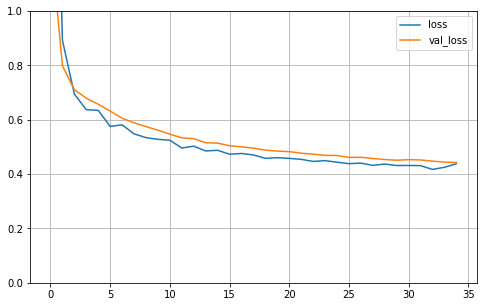

In [25]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [27]:
model.evaluate(test_set, steps=5160//batch_size)

161/161 [==============================] - 0s 372us/step - loss: 0.4390


0.43904489278793335